# Introduction
 
Between 2020 and 2021 as COVID-19 spread through the globe, many countries imposed lockdowns which included the temporary closure of gyms. Stuck in our homes many turned to YouTube and workout videos to keep active. According to one source from 2020, reports that fitness YouTubers would frequently appear in YouTube top 10 ([Bland, 2020](https://www.theguardian.com/technology/2020/dec/14/joe-wicks-video-most-popular-youtube-2020)).  
 
However, whilst YouTube is a fantastic platform for users, it is also highly competitive for those creating content. The category of home workouts and fitness is no exception. Many creators have had to create a niche for themselves in catering for a specific audience, with some offering workouts for weight loss, whilst others encourage views to keep fit. 
 
This niche is not only key for the YouTuber but also for other stakeholders such as the viewer and businesses hoping to work with or host ads on the video. Therefore using primarily the data from the YouTube API, supported by the information on [Social Blade](https://socialblade.com/youtube/realtime), this project aims to examine variations between some of the most popular fitness YouTubers. The project will also investigate whether there are any outliers where the performance of the video does not fully align with overall average. This may be because of the nature of the video, the way it was uploaded or for a different reason. 

It should be acknowledged that due to various plethora of reasons, the sample size will be relatively small, 8 YouTubers. This will unfortunately limit the conclusions that can be drawn.
 


In [1]:
!pip install openpyxl

# libraries for data handling
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


pd.options.mode.chained_assignment = None

# library and code specific to loading data to kaggle notebook
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# libaries for visualising data         
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# colour formats for each youtube channel under review. 
# social Blade version 
colors_df = {"ChloeTing": "indigo", 
         "Pamela Reif ": "mediumaquamarine", 
         "MadFit": "pink", 
         "EmiWong": "lightblue", 
         "TheBodyCoachTV/JoeWicks": "darkturquoise",
         "Heatherrobertsoncom": "orange", 
         "AllblancTV": "cornflowerblue", 
         "growingannanas" : "violet"
         }
# YouTube API version 
colors = {"Chloe Ting": "indigo", 
         "Pamela Reif": "mediumaquamarine", 
         "MadFit": "pink", 
         "emi wong": "lightblue", 
         "The Body Coach TV": "darkturquoise",
         "Heather Robertson": "orange", 
         "Allblanc TV": "cornflowerblue", 
         "growingannanas" : "violet"
         }


# load data
df = pd.read_excel("/kaggle/input/fitness-youtubers/Fitness Youtube data.xlsx", engine="openpyxl")
AllBlancTV = pd.read_csv("/kaggle/input/fitness-youtubers/AllBlancTV.csv", index_col = "Unnamed: 0")
EmiWong =  pd.read_csv("/kaggle/input/fitness-youtubers/EmiWong.csv", index_col = "Unnamed: 0")
ChloeTing = pd.read_csv("/kaggle/input/fitness-youtubers/ChloeTing.csv", index_col = "Unnamed: 0")
JoeWicks = pd.read_csv("/kaggle/input/fitness-youtubers/JoeWicks.csv", index_col = "Unnamed: 0")
growingannanas = pd.read_csv("/kaggle/input/fitness-youtubers/growingannanas.csv", index_col = "Unnamed: 0")
Pamela = pd.read_csv("/kaggle/input/fitness-youtubers/Pamela.csv", index_col = "Unnamed: 0")
Heather = pd.read_csv("/kaggle/input/fitness-youtubers/Heather.csv", index_col = "Unnamed: 0")
MadFit = pd.read_csv("/kaggle/input/fitness-youtubers/MadFit.csv", index_col = "Unnamed: 0")

#workout -
# create large DataFrame merging all the YouTube API data for each of the channels
workouts = pd.concat([AllBlancTV,EmiWong, ChloeTing, JoeWicks, growingannanas, Pamela, Heather, MadFit])
#drop columns with limited/ no data
workouts.drop(["caption","favouriteCount"], axis = 1, inplace = True)

# seperate published at variable which includes date and time to two variables
workouts[["Publish_date", "Publish_time"]] = workouts["publishedAt"].str.split(" ", expand = True)

# reformat date variable to datetime 
workouts["Publish_date"] = pd.to_datetime(workouts["Publish_date"], format = "%Y-%m-%d")

# add new column for when the data was complied
workouts["creation"] = pd.to_datetime('2022-08-08')

# calculate when the videos were published relative to the day when the data was complied
workouts["days"] = (workouts["creation"]-workouts["Publish_date"]).dt.days

# drop published at variable
workouts.drop(["publishedAt" ], axis = 1, inplace = True)

# Social Blade data - 
# convert created data field to datatime format
df["created"] = pd.to_datetime(df["created"])



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 4.6 MB/s eta 0:00:00


# Overview
The 8 channels selected are as follows: 

In [2]:
# show Social Blade data 
df

,Name,Youtube channel,chanel id,Subs (million),Video views,Country,grade,channel type,created
0,AllblancTV,https://www.youtube.com/c/AllblancTV,UCq7bR6RxqqOx8cptc1-0AVQ,1.90,2.205824e+08,KR,B+,Sports,2018-01-17
1,ChloeTing,https://www.youtube.com/c/ChloeTing,UCCgLoMYIyP0U56dEhEL1wXQ,24.00,2.734736e+09,AU,B+,Howto,2011-08-17
2,growingannanas,https://www.youtube.com/c/growingannanas,UCsLF0qPTpkYKq81HsjgzhwQ,1.88,3.559225e+08,DE,B+,Sports,2017-01-20
3,TheBodyCoachTV/JoeWicks,https://www.youtube.com/c/TheBodyCoachTV,UCAxW1XT0iEJo0TYlRfn6rYQ,2.81,3.242040e+08,GB,B+,Sports,2011-08-12
4,Pamela Reif,https://www.youtube.com/c/PamelaRf1,UChVRfsT_ASBZk10o0An7Ucg,9.01,1.505679e+09,DE,B+,Sports,2013-09-16
5,MadFit,https://www.youtube.com/c/MadFit,UCpQ34afVgk8cRQBjSJ1xuJQ,7.25,7.756795e+08,CA,B+,People,2018-03-02
6,EmiWong,https://www.youtube.com/c/EmiWong,UCvGEK5_U-kLgO6-AMDPeTUQ,5.55,7.108527e+08,HK,B+,People,2014-11-02
7,Heatherrobertsoncom,https://www.youtube.com/c/Heatherrobertsoncom,UCOpsZxrmeDARilha1uq4slA,2.08,3.172166e+08,CA,B+,Howto,2014-09-26


## Social Blade Data

All YouTubers in thus project boast over a million subscribers. They also possess a grade of over B on Social Blade at the time of this project. Interestingly, the data from Social Blade indicate that whilst each channel appears to offer fitness videos, they are categorised differently with the channels distributed between sports, how-to and people. This indicates that there may not be a dedicated type for this genre.

The most popular YouTuber both in terms of subscriber counts and overall views is Chloe Ting followed by Pamela Reif. It should be emphasised once again that this is a sample of some of the best performing YouTubers. Therefore, whilst Growingannanas and Allblanc TV may appear at the bottom of the graphs, the scale is in either millions or billions. 

In [3]:
# create graph
fig = px.bar(df.sort_values( by =["Subs (million)"], ascending = False), x ="Subs (million)",y = "Name",  color = "Name", template  = "simple_white", 
           color_discrete_map=colors_df,)

# format graph 
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Fitness YouTubers by Subscription <b><br><sup>Data from Social Blade - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

In [4]:
# create graph
fig = px.bar(df.sort_values( by =["Video views"], ascending = False), x ="Video views",y = "Name",  color = "Name", template  = "simple_white", 
           color_discrete_map=colors_df)

# format graph 
fig.update_layout(showlegend=True,  
                  title= dict(text ="<b>Fitness YouTubers by video views <b><br><sup>Data from Social Blade - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

The distribution of subscriptions within channel types appears to be the broadest in the how-to category. That said  as the next graphs indicate, in general, Chloe Ting’s data from Social Blade indicate that she may be an outlier compared to her peers in this project. 

In addition to how-to, sports also has a broad distribution with a significant difference between Pamela and Growingannanas in their subscriber account. 

In [5]:
# create graph
fig = px.scatter(df, x = "channel type", y = "Subs (million)",size = "Subs (million)", color = "Name", template  = "plotly_white", 
           color_discrete_map=colors_df)

# format graph 
fig.update_layout(showlegend=True,  
                  title= dict(text ="<b>Fitness YouTubers data by channel type and subscription count <b><br><sup>Data from Social Blade - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

The data from Social Blade also indicate that the impact of creation date on subscription may be limited. Chloe, once again, appears as an outlier even when creation date is accounted for.

In [6]:
# create graph
fig = px.scatter(df, x = "created", y = "Video views",size = "Subs (million)", color = "Name", template  = "plotly_white", 
           color_discrete_map=colors_df)

# format graph 
fig.update_layout(showlegend=True,  
                  title= dict(text ="<b>Fitness YouTubers data by channel type and video views <b><br><sup>Data from Social Blade - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

It should be also noted that Youtubers in this sample originate from an array of nations through Pamela and Growingannanas are both from Germany. It could be said that this may split the domestic audience for these channels. Furthermore, given that Pamela has been active for a longer period of time, this may pose challenges to  Growingannanas in terms of growth (i.e. [first mover advantage](https://www.investopedia.com/terms/f/firstmover.asp)).  

In [7]:
# create graph
fig = px.scatter(df, x = "Country",  y = "Video views",size = "Subs (million)", color = "Name", template  = "plotly_white", 
           color_discrete_map=colors_df)

# format graph 
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Fitness YouTubers country data by subscription video views <b><br><sup>Data from Social Blade - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

# YouTube API data

## Understanding the data
As indicated previously, another source of data for this project can be secured via the YouTube API. The data for this specific project has been extracted using the method outlined by [Thu Vu](https://www.youtube.com/watch?v=D56_Cx36oGY&t=1175s). It is relatively clean but there may be some issues with the original source. This is exemplified best in the lack of information in descriptions and tags of some videos.

In [8]:
# view data
workouts.head()

,video_id,channelTitle,title,description,tags,viewCount,likeCount,commentCount,duration,definition,pushblishDayName,durationSecs,tagCount,Publish_date,Publish_time,creation,days
0,wJhYFxMmB5E,Allblanc TV,BURN FAT WORKOUT AT HOME (No Equipment) l 체지방 ...,Follow along this Fullbody Workout at home. Yo...,"['allblanc tv', '올블랑tv', 'no gym workout', 'fa...",9913.0,737.0,46.0,PT12M11S,hd,Sunday,731.0,21,2022-08-07,14:08:50+00:00,2022-08-08,1
1,RrxzDYu1JfY,Allblanc TV,24 min. Fat Burning Full Body Cardio HIIT [No ...,"Hello, Allbengers.\nHere is 48 workout routine...","['올블랑tv', 'allblanc tv', 'no gym workout', 'fa...",21843.0,1229.0,70.0,PT24M24S,hd,Sunday,1464.0,24,2022-07-31,12:00:19+00:00,2022-08-08,8
2,ZIuzJ4tzX5c,Allblanc TV,"Daily Morning Stretch - tight muscle, flexibil...",▶️Allblanc Free Workout Program : https://bit....,NaN,20218.0,1242.0,48.0,PT10M20S,hd,Sunday,620.0,0,2022-07-24,13:47:28+00:00,2022-08-08,15
3,Giq2h0Ifjn4,Allblanc TV,No Gym Fullbody Workout (2022 Upgrade Ver.) l ...,"안녕하세요, 올벤져스 여러분!\n오늘은 저희 채널의 2,400만 조회수 영상, 5분...","['home workout', 'fatloss', 'no gym', 'home tr...",17670.0,875.0,35.0,PT5M27S,hd,Wednesday,327.0,16,2022-07-20,11:00:20+00:00,2022-08-08,19
4,JC-eboUA_h0,Allblanc TV,둘이 같이 하다가 하나가 죽으면 나도 죽는 운동 l 4 MIN PARTNER WOR...,오늘 운동 같이 할 사람~?\nWho's gonna exercise together...,"['올블랑tv', 'allblanc tv', 'no gym workout', 'fa...",9803.0,494.0,32.0,PT4M24S,hd,Saturday,264.0,23,2022-07-16,14:10:17+00:00,2022-08-08,23


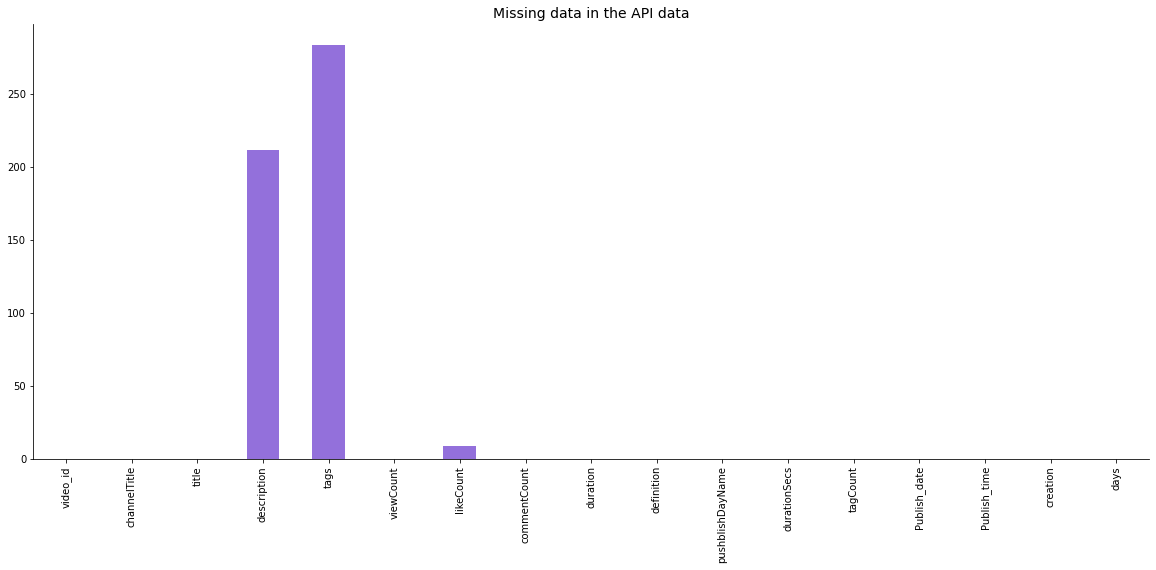

In [9]:
# create graph
plt.figure(figsize = (20,8))
workouts.isnull().sum().plot.bar( color = "mediumpurple");

# format graph 
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Missing data in the API data", fontsize = 14)
plt.show()

In [10]:
# view data where likecount is null 
workouts[workouts["likeCount"].isnull()]

,video_id,channelTitle,title,description,tags,viewCount,likeCount,commentCount,duration,definition,pushblishDayName,durationSecs,tagCount,Publish_date,Publish_time,creation,days
12,LilAnrOdwY0,MadFit,5 stretches you should do EVERY MORNING! #shorts,These are simple yet effective stretches that ...,NaN,146259.0,NaN,41.0,PT37S,hd,Tuesday,37.0,0,2022-07-12,13:00:12+00:00,2022-08-08,27
15,Am3k90jaPSg,MadFit,total upper body workout #shorts,Here's a complete upper body workout you can d...,NaN,98968.0,NaN,22.0,PT14S,hd,Wednesday,14.0,0,2022-07-06,13:00:10+00:00,2022-08-08,33
16,YlS-RFR_iYQ,MadFit,easy stretches for BEGINNERS #shorts,"If you want to work on your flexibility, but a...",NaN,79955.0,NaN,15.0,PT31S,hd,Tuesday,31.0,0,2022-07-05,13:00:19+00:00,2022-08-08,34
19,tShcKYbGbtM,MadFit,modify ab exercises for BEGINNERS! #shorts,Let's learn to MODIFY some classic ab exercise...,NaN,95544.0,NaN,20.0,PT24S,hd,Wednesday,24.0,0,2022-06-29,13:00:38+00:00,2022-08-08,40
21,RWUIfDLg-2Y,MadFit,how to modify a push up for BEGINNERS #shorts,"If you CAN'T DO A PUSH UP, this one is for you...",NaN,137275.0,NaN,42.0,PT22S,hd,Friday,22.0,0,2022-06-24,13:00:26+00:00,2022-08-08,45
26,UzVTYnC81JI,MadFit,BTS of filming workouts #shorts,sometimes I have to hold back my giggles watch...,NaN,4605693.0,NaN,702.0,PT15S,hd,Thursday,15.0,0,2022-06-16,13:00:27+00:00,2022-08-08,53
27,gbahWVTN-Jo,MadFit,MODIFY squats & lunges! high impact vs. low im...,Sometimes we need to modify to make exercises ...,NaN,1351994.0,NaN,73.0,PT16S,hd,Tuesday,16.0,0,2022-06-14,14:56:57+00:00,2022-08-08,55
29,wvOQ3Fgl9Hk,MadFit,getting ready for a day of shooting in the stu...,All the essentials I need for a great workout ...,NaN,104263.0,NaN,25.0,PT8S,hd,Friday,8.0,0,2022-06-10,16:15:59+00:00,2022-08-08,59
35,rketCPf_JEQ,MadFit,bts: creating a dance party workout #shorts,Ever wondered HOW these dance party workouts c...,"['bts', 'shorts', 'behind the scenes', 'harry ...",498718.0,NaN,269.0,PT1M,hd,Monday,60.0,9,2022-05-30,18:12:54+00:00,2022-08-08,70


There are also some videos with no likes. Additional examination suggests that these may be cancelled videos or shorts.  Given that the focus of this project is on the workouts aspect of each channel, such videos can be dropped from the dataset. That said, as it will be discussed later, firstly these are videos with no information about likes. It is different from videos with 0 likes which continue to exist in the dataset. This applies also to other numerical fields such as views and comments. 

Likwise, shorts, whcih are tipically marked in the title or are under 60s are unlikley to be workout videos and therefore can also be dropped from the dataset. Once again it should be noted that whilst this captures some of the non-workout videos, there is a high likelihood that other non-workout videos remain in the dataset. Regardless, these changes cut the dataset to just over 2600 videos. 

In [11]:
# drop videos where likes is null
workouts.drop(workouts[workouts["likeCount"].isnull()].index, inplace = True)

# drop videos marked as a short or is less than 60s 
shorts = workouts[workouts["title"].str.contains("#shorts")].index
workouts.drop(shorts, axis =0, inplace = True)

shorts_1 = workouts[workouts["durationSecs"]<=60].index
workouts.drop(shorts_1, axis =0, inplace = True)

As for these non-workout videos such as discussions, diet tips etc, restricting or removing such videos is ideal for this project. However, given the size of the dataset, scanning every video for such content may be ineffective. Subsequently, alternative methods should be considered. One of these is to focus on those that appear as a mathematical outlier and investigate these and decide whether they should be included or excluded from the study. For example, the duration of the videos may provide insight into possible non-workout videos if they differ significantly from the channel's typical video length. 

Subsequently, the boxplot highlights outliers based on duration. Inspecting these, leads to a handful of videos which are vlogs and live chats. Therefore can be excluded. This results in a dataset of just over 2500 videos. There is a possibility that further outliers remain in the dataset, but this may be the best that can be achieved at this stage. 

In [12]:
#create graph
fig = px.box(workouts, x = "durationSecs", color = "channelTitle", template  = "plotly_white", 
           color_discrete_map=colors)

# format graph 
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Distribution of video lengths <b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

In [13]:
"""for each channel, investiagte videos with lengths which are a mathamatical outlier. 
Then inspect the videos returned. If they are indeed non-workout videos, the data is dropped"""


BodyCoach_outliers = workouts[(workouts["channelTitle"]=="The Body Coach TV") & (workouts["durationSecs"]> 2680)]["title"]
BodyCoach_outliers.reset_index().set_index("index")

,title
index,
259,PE With Joe | Monday 1st June
386,The Body Coach: UK Schools HIIT Tour | FULL DO...
489,The world's first HIIT in a football stadium #...
614,Lean In 15 Closing Book Tour | Live Q&A | London


In [14]:
workouts.drop([386, 614], inplace = True)
# This step is repeated for the the remaining channels and the following videos can be dropped

workouts.drop([429, 69, 383, 5, 14, 167, 168, 162, 311, 83, 136, 196, 95, 108], inplace = True)

# as the string live in videos indicated that it could be also outliers, this is checked in a similar manner and one video is dropped
workouts[workouts["title"].str.contains("LIVE")]
workouts.drop([124], inplace = True)
workouts.reset_index(drop=True, inplace = True)

print( "Number of entries/videos:", workouts.shape[0])

Number of entries/videos: 2532


## Video Uploads
Assessing the remaining videos indicate that the channels Pamela has the least number of videos at 53 and Joe Wicks/Body Coach has the highest at over 500. However, many of the channels have around 200 to 500 videos. Given that Joe Wicks has only been on the platform since 2018, he is extremely active.


In [15]:
# create graph
fig = px.histogram(workouts, x =  "channelTitle", color = "channelTitle", template  = "simple_white", 
           color_discrete_map=colors, opacity=0.7 )

# format graph 
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>No. of videos per YouTuber <b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

In contrast, Pamela has been active since 2014 and as such there is a possibility that she has deleted some of her older videos. This may be supported by the lack of clips between 2013 and 2016 and between 2017 and 2018. Alternatively, she may have been relatively inactive until 2018. 

In [16]:
# extract Pamela's videos 
Pamela_videos = workouts[workouts["channelTitle"]=="Pamela Reif"].sort_values("Publish_date")

# create graph
fig = px.histogram(Pamela_videos, x ="Publish_date", template  = "simple_white",opacity=0.7)

# format graph 
fig.update_traces(marker_color='mediumpurple')
fig.update_layout(showlegend=False, 
                  title= dict(text ="<b>Video uploads for Pamela <b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

Many YouTubers upload on a specific day as consistency is rumoured to be a key factor in YouTube’s algorithm. Fitness YouTubers in this project are no exception. The most common date for uploads appears to be Thursdays. Mondays, in contrast, appears to be a rest day with the least number of uploads from all YouTubers.

Chloe and Pamela, who are the best performing YouTubers based on Social Blade data, have a focused upload schedule as the majority of the uploads are focused on two specific dates. Pamela favours uploading videos between Wednesday to Friday whilst Chole opts for Tuesday and Thursday. This may suggest that whilst consistency is key, there is no requirement for the YouTubers to upload every day but rather to upload in a manner that can be sustained overtime.

In [17]:
# create graph
fig = px.box(workouts, x = "pushblishDayName", color =  "channelTitle", template  = "plotly_white", 
           color_discrete_map=colors)

# format graph 
fig.update_xaxes(categoryorder='array', categoryarray= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

fig.update_layout(showlegend=True,  
                  title= dict(text ="<b>Video Upload schdules <b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

The histograms of the uploads over time highlights how the YouTubers responded to increase in demand for workout videos as the uploads spiked between March and June of 2020. However, it is clear that before COVID-19, uploads appear to have been generally increasing starting as far back as 2016. This may be due to increasing popularity of the genre and more competition as by 2018 all of the channels in this study weere established and 2 channels specifically were created in 2018.

Post COVID-19, there appears to be a dip in uploads by all creators. This is likely to be an indication of one a plethora of factors including burnout, changes in lifestyle or unmaintainable upload schedule. 

In [18]:
# create graph
fig = px.histogram(workouts, x = "Publish_date", color = "channelTitle", template  = "simple_white", 
           color_discrete_map=colors, opacity=0.7 )

# format graph
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Video uploads <b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

Looking at the uploads individually, demonstrates how each YouTuber increased their upload schedule with Joe Wicks, Growingannanas, Heather Robertson and MadFit significantly increasing their uploads in 2020. Heather and Growingannanas appear to be the only YouTubers who have been able to maintain or increase their upload schedule since the pandemic. However, Heather Robertson’s upload dropped in 2021 but has since recovered in recent months.  Emi Wong and Chole Ting appear to have maintained a relatively even upload schedule with some minor increases in 2020.

This data also highlights that in addition to Pamela previously, Heather may have also removed some videos or had periods of inactivity in her early years of YouTube. 

In [19]:
# create graph
fig = px.histogram(workouts, x="Publish_date", color = "channelTitle", facet_col="channelTitle", 
                   template  = "simple_white", facet_col_wrap =3,height = 1000,
           color_discrete_map=colors,  opacity=0.7)

# create graph
fig.update_layout(showlegend=False, 
                  title= dict(text ="<b>Video uploads by channel <b>",
                              x=0.5,
                              font = dict(family ="Old Standard TT", size = 24) ), ) 

## Video Lengths

One of the key factors which differentiates the videos uploaded by fitness YouTubers is the length of the videos. For instance, Heather and Growingannanas provide longer videos which typically include warmups and cool downs. In contrast, Chole, Pamela and Allblanc provide shorter videos with separate warmup/ cool down videos. One aspect of this is that providing separate videos enables these YouTubers to save their energy and direct their audience to reuse effective warmups/cool downs. This could be inferred as them being more effective as content creators, but one could also say that Heather and Growingannanas offer better content in terms of warmups and cool downs as they can be catered to the specific workouts.


In [20]:
# create graph
fig = px.box(workouts, x = "durationSecs", color = "channelTitle", template  = "plotly_white",
           color_discrete_map=colors)

# format graph
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Average length of videos <b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

## Tags

Many of the videos by each creator utilise tags. These should enable the YouTube algorithm to effectively recommend their videos to other users. The typical number of tags for this sample is around 18 to 26 tags per video. 

However, based on the creator, the number of tags differs greatly. For example, Joe Wicks appears to have many videos with no tags and his overall tag count appears to be below the overall average. This may be impacting his video performance. In contrast, Pamela appears to have an extremely high tag count which may be positively affecting her viewership. Likewise, Growingannanas also has a high tag count. 


In [21]:
# create graph
fig = px.box(workouts, x="tagCount", template  = "plotly_white", )

# format graph
fig.update_traces(marker_color='mediumpurple')
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Distribution of Tags <b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

In [22]:
# create graph
fig = px.histogram(workouts, x="tagCount", color = "channelTitle", facet_col="channelTitle", template  = "simple_white", 
                   facet_col_wrap = 3,height = 800,opacity=0.7, 
           color_discrete_map=colors, )

# format graph
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Distribution of Tags <b>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

The tags themselves are somewhat complex to decipher as there is no standardised system which all creators follow. Whilst this offers greater flexibility to the YouTuber, comparisons can be an issue. For instance, some of the creators use their channel names as a tag whilst others do not. Therefore, each channel and the tags they use may be best reviewed individually. However, as one may expect of the sample YouTubers, in the overall review of popular tags, key words such as “home workout”, “HITT”  and “Full body workout” appear in the top 10. 


In [23]:
# function to create dataframe of the most common tags 
def tags (df): 
    tags = df[["tags"]]
    tags.dropna(inplace = True)
    
    
    tags_list ={}
    
    for i in tags["tags"]:
        tags_split = i.split(",")
        tags_stripped = [name.strip().strip('[]').strip("\''") for name in tags_split]
        for name in tags_stripped: 
            tags_list[name] = tags_list.get(name, 0)+1
            tags_1 = pd.DataFrame.from_dict(tags_list, orient='index', columns=['count']).reset_index()
            
    return tags_1

# function to use create visualisation of most common tags
def tag_viz(df, channel, x = 10, channel_color = "mediumpurple" ): 
    channel_data= df[df["channelTitle"]==channel]
    channel_tags = tags(channel_data)
    
    fig = px.bar(channel_tags.sort_values(by = "count", ascending = False).head(x), x = "index", y = "count", 
                 template  = "simple_white",opacity=0.7,  labels={
                     "index": "Tag Count"},)
    fig.update_traces(marker_color= channel_color, )
    
    return fig

In [24]:
# create dataframe counting the most common tags
full_tags = tags( workouts)

# create graph
fig = px.bar(full_tags.sort_values(by = "count", ascending = False).head(10), x = "index", y = "count", 
            template  = "simple_white", labels={
                     "index": "Tag Count"},opacity=0.7 )

# format graph 
fig.update_traces(marker_color='mediumpurple')

fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Popular Tags <b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

In [25]:
# create graph
fig = tag_viz(workouts,'emi wong', channel_color = "lightblue" )

# format graph 
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Popular Tags for Emi Wong<b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

In [26]:
# create graph
fig = tag_viz(workouts,'Chloe Ting', channel_color = "indigo" )

# format graph 
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Popular Tags for Chloe Ting<b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

For Emi, based on the most popular tags, the content focuses more on flat burning and achieving the “summer body”. In that regard, Emi and Chloe are similar in the type of videos they produce. Chloe also has tags relating to the theme of weight loss. 

Emi and Chole’s tags also reveal that there are indeed some non-workout videos remaining in this dataset, tags such as "travel vlog” and “what I eat”. Whilst the existence of such videos was suspected, this highlights the importance of domain knowledge with respect to each Youtuber to ensure that the dataset is robust/high quality. Whilst in an ideal world, these videos should be dropped, for the purpose of this project, they will sadly remain. However, extra caution will be needed when drawing conclusions due to their existence.

Examining the remaining YouTubers, the majority of Allblanc TV’s tags consist of their channel name. Therefore, the top tags list needs to be expanded. Doing so reveals that the channel may specialise in not only home workouts but specifically Tabata workouts. This is a similarity shared with other channels such as Growingannanas and Joe Wicks as they too use more fitness centric terms such as fitness, HITT, and health. 

In [27]:
# create graph
fig = tag_viz(workouts,'Allblanc TV', 15, channel_color = "cornflowerblue")

# format graph 
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Popular Tags for Allblanc TV<b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

In [28]:
# create graph
fig = tag_viz(workouts,'The Body Coach TV' , channel_color = "darkturquoise")

# format graph 
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Popular Tags for The Body Coach TV<b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

In [29]:
# create graph
fig = tag_viz(workouts,'growingannanas', channel_color = "violet")

# format graph 
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Popular Tags for growingannanas<b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

The contrast between Chloe/Emi’s tags and Allblanc/ Growingannanas/ Joe Wicks indicate that within this group of content creators who focus on home workouts, the type of workouts and the audience they serve are different. Alternatively, at the very least, they foster a different mindset towards workouts.

Palma’s tags appear to indicate that she may sit in-between the two groups, with a greater leaning towards weight loss. For example, she uses terms such as “exercise” and “sport” but also “lose weight”. This is in line with general opinion of her workouts being extremely challenging whilst the audience also appear to have a focus on losing weight. 

In [30]:
# create graph
fig = tag_viz(workouts,'Pamela Reif', channel_color = "mediumaquamarine" )

# format graph 
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Popular Tags for Pamela Reif<b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

Heather most certainly fits strongly with the "active" focused YouTubers but her strength lies very much with HITT workouts. She also appears to use equipment frequently such that "dumbbells" appear in her top 15 tags. This indicates that she may be catering to a more advanced audience with respect to fitness/workouts.

In [31]:
# create graph
fig = tag_viz(workouts,'Heather Robertson', 15, channel_color = "orange" )

# format graph 
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Popular Tags for Heather Robertson<b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

MadFit appears to be very focused on abs but her tags lack any information on type of exercise which would be indicative of the active YouTubers who typically use tags such as HITT, fitness or exercise. 

In [32]:
# create graph
fig = tag_viz(workouts,'MadFit', 15, channel_color = "pink" )

# format graph 
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Popular Tags for MadFit <b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

In short, excluding MadFit, the creators can be grouped as follows: 

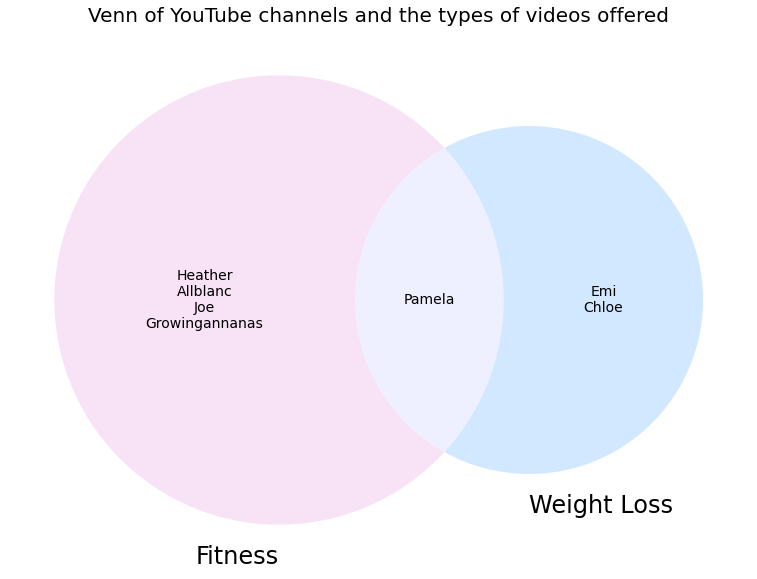

In [33]:
# method from https://compucademy.net/python-venn-diagrams/
from matplotlib_venn import venn2

# create graph
plt.figure(figsize = (25,10))
labels=['Fitness','Weight Loss']

fitness = set(["Joe", "Growingannanas", 'Heather', 'Pamela', "Allblanc"])
wehightloss = set(["Emi","Chloe", 'Pamela'])


diagram = venn2(subsets=[fitness,wehightloss] ,
                 set_labels=labels,set_colors=("orchid","dodgerblue"),alpha=0.2 )


diagram.get_label_by_id("10").set_text("\n".join(fitness - wehightloss))
diagram.get_label_by_id("11").set_text("\n".join(fitness & wehightloss))
diagram.get_label_by_id("01").set_text("\n".join(wehightloss - fitness))

# format graph
for text in diagram.set_labels:
    text.set_fontsize(24)

for text in diagram.subset_labels:
    text.set_fontsize(14)

plt.title("Venn of YouTube channels and the types of videos offered", fontsize = 20)
plt.show()

It should be noted that in terms of creators, the sample size is relatively small. As such, with more data, a group could be established in which MadFit fits in.  


## View Count

For the majority of the YouTubers in this study, they appear to have a handful of exceptional videos, though frequency of such videos appears to differ between creators. Chloe has the best performing video of this dataset. However, Pamela has more videos which outperformed for her and her typical view count. Like count also mirrors this picture.


In [34]:
# create graph
fig = px.box(workouts, x = "viewCount", color = "channelTitle", template  = "plotly_white", 
           color_discrete_map=colors)

# format graph 
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Distribution of views<b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

Joe Wicks appears to have the lowest number of likes. Further investigations will be needed to understand why his video performance is limited compared to his peers such as whether he reminds the audience to like the video or whether his demography is such that they typically do not like videos.

In [35]:
# create graph
fig = px.box(workouts, x = "likeCount", color = "channelTitle", template  = "plotly_white", 
           color_discrete_map=colors)

# format graph 
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Distribution of likes <b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

For comments, Chloe outperforms Pamela. This indicates that for those looking for a robust community to support them through their fitness journey, Chloe may be the best. One contributing factor for this may be that Chloe speaks and encourages her audience during workout whilst Pamela frequently opts for minimum conversation. The two styles are relatively common and both styles are used by the other Youtubers in this sample. Sadly, once again Joe Wicks appears to have the smallest community in terms of comments. 

In [36]:
# create graph
fig = px.box(workouts, x = "commentCount", color = "channelTitle", template  = "plotly_white", 
           color_discrete_map=colors)

# format graph 
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Distribution of comments <b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

These three variables, likes/views/comments, have a cyclical relationship whereby one feeds into another due to the YouTube algorithm. That said, the scatter diagrams highlight that they have a linear if not an exponential relationship and highlights how viral videos have performed significantly better than typical videos for the YouTubers.

In [37]:
# create graph
fig = px.scatter(workouts, x = "viewCount", y = "commentCount", color = "channelTitle",template  = "plotly_white", 
           color_discrete_map=colors)

# format graph 
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Distribution of view and comments <b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

In [38]:
# create graph
fig = px.scatter(workouts, x = "viewCount", y = "likeCount", color = "channelTitle", template  = "plotly_white", 
           color_discrete_map=colors)

# format graph 
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Distribution of view and likes <b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

In [39]:
# create graph
fig = px.scatter(workouts, x = "likeCount", y = "commentCount", color = "channelTitle", template  = "plotly_white", 
           color_discrete_map=colors)

# format graph 
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Distribution of likes and comments <b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

In addition, factors such as length of time a video has been published may affect how many likes, views and comments it has. It is most certainly the case that the majority of likes/comments/views are garnered when a video is first published, these rates do not stop rising after a specific duration. Therefore, the three variables need to be evaluated with respect to duration of publication. One could argue that this also applies for the duration of a video but this is up for discussion as some argue that audiences prefer shorter videos.

In [40]:
# calculate the view/like/comment columns relative to days since publication 
workouts["viewCount_adj"] = workouts["viewCount"] / workouts["days"]
workouts["likeCount_adj"] = workouts["likeCount"] / workouts["days"]
workouts["commentCount_adj"] = workouts["commentCount"] / workouts["days"]

This results in the following graphs:

In [41]:
# create graph
fig = px.box(workouts, x = "viewCount_adj", color = "channelTitle",template  = "plotly_white", 
           color_discrete_map=colors)

# format graph 
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Distribution of views (adjusted) <b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

For views, adding the publication time has minimum impact. For likes and comments, however, there are notable changes. The variations between the channels appears to be more limited once duration is accounted for. Therefore, it could be argued that the previous view of only the variables favoured older videos and in turn those who were active for a long time. 

In [42]:
# create graph
fig = px.box(workouts, x = "likeCount_adj", color = "channelTitle", template  = "plotly_white", 
           color_discrete_map=colors)

# format graph 
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Distribution of likes (adjusted) <b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

In [43]:
# create graph
fig = px.box(workouts, x = "commentCount_adj", color = "channelTitle",template  = "plotly_white", 
           color_discrete_map=colors)

# format graph 
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Distribution of comments (adjusted) <b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

In [44]:
# create graph
fig = px.scatter(workouts, x = "viewCount_adj", y = "commentCount_adj", color = "channelTitle", template  = "plotly_white", 
           color_discrete_map=colors,)

# format graph 
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Distribution of views and comments (adjusted) <b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

In [45]:
# create graph
fig = px.scatter(workouts, x = "likeCount_adj", y = "commentCount_adj", color = "channelTitle", template  = "plotly_white", 
           color_discrete_map=colors,)

# format graph 
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Distribution of likes and comments (adjusted) <b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

In [46]:
# create graph
fig = px.scatter(workouts, x = "viewCount_adj", y = "likeCount_adj", color = "channelTitle", template  = "plotly_white", 
           color_discrete_map=colors,)

# format graph 
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Distribution of views and likes (adjusted) <b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

The 3D model highlights the relationship between the adjusted three variables and it is clear that there is an exponential relationship between views and the other two variables. 
However, there seems to be outliers as some videos standout relative to the majority of the videos. 

In [47]:
# create graph
fig = px.scatter_3d(workouts, x = "viewCount_adj", y = "likeCount_adj", z ="commentCount_adj", color = "channelTitle", template  = "plotly_white", 
           color_discrete_map=colors, opacity=0.5, size_max=18,)

# format graph
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

# Anomaly detection

As previously indicated the dataset does contain various anomalies from viral videos to non-workout videos. As such, an anomaly detection model may be run on the dataset.

That said, there are some videos that can be identified as outliers without the use of such methods. As previously mentioned, there are videos where there is a 0 logged besides views/likes/comments. These can be considered outliers as these are not typical for a YouTuber with over a million subscribers. As such the 47 videos with 0 comments can be dropped. For reference, Joe Wicks is the most affected by this change.


In [48]:
print("Videos with 0 views: ", workouts[workouts[ 'viewCount']==0].shape[0])
print("Videos with 0 likes: " ,workouts[workouts[ 'likeCount']==0].shape[0])
print("Videos with 0 comments: ", workouts[workouts[ 'commentCount']==0].shape[0])

Videos with 0 views:  0
Videos with 0 likes:  0
Videos with 0 comments:  47


In [49]:
processed = workouts[(workouts['commentCount']>0)& (workouts['likeCount']>0) & (workouts['viewCount']>0)]

In [50]:
processed = workouts[(workouts['commentCount']>0)& (workouts['likeCount']>0) & (workouts['viewCount']>0)]

droppped_videos = workouts[~workouts.index.isin(processed.index)]

fig = px.histogram(droppped_videos, x = "channelTitle", color = "channelTitle", template  = "plotly_white", 
           color_discrete_map=colors, opacity=0.5,)

# format graph 
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Videos with 0 views, comments or likes<b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 24) )) 

In [51]:
print("Revised dataset size:", processed.shape[0])

Revised dataset size: 2485


For the remaining videos anomalies can be identified through the method outlined in the [notebook by Mitra Mirchafiee](https://www.kaggle.com/code/mitramir5/anomaly-detection-skewed-features-and-stories/notebook). As the variables are all positively skewed, they will need to be transformed. Then, using the EllipticEnvelope method, possible outliers can be identified assuming that approx. 10% of the dataset are outliers. 

In [52]:
# method from mitra mirshafiee https://www.kaggle.com/code/mitramir5/anomaly-detection-skewed-features-and-stories/notebook 

from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p

test = processed['viewCount']
print('Skewness before and after transformation:')
print('Before: ', test.skew())
test_t_log = np.log(test)
print('After log:', test_t_log.skew())
test_t_box = boxcox1p(test,stats.boxcox_normmax(test+1))
print('After Box-Cox:', test_t_box.skew())

Skewness before and after transformation:
Before:  7.0771016699843186
After log: 0.11748203703423366
After Box-Cox: 0


/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



In [53]:
test = processed['likeCount']
print('Skewness before and after transformation:')
print('Before: ', test.skew())
test_t_log = np.log(test)
print('After log:', test_t_log.skew())
test_t_box = boxcox1p(test,stats.boxcox_normmax(test+1))
print('After Box-Cox:', test_t_box.skew())

Skewness before and after transformation:
Before:  8.702590941543521
After log: 0.014202827910450529
After Box-Cox: -0.004033154755694503


/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:4053: PearsonRNearConstantInputWarning:

An input array is nearly constant; the computed correlation coefficient may be inaccurate.



In [54]:
test = processed['commentCount']
print('Skewness before and after transformation:')
print('Before: ', test.skew())
test_t_log = np.log(test)
print('After log:', test_t_log.skew())
test_t_box = boxcox1p(test,stats.boxcox_normmax(test+1))
print('After Box-Cox:', test_t_box.skew())

Skewness before and after transformation:
Before:  9.086552865068994
After log: -0.045301525725630176
After Box-Cox: -0.010189122133866874


As Box-Cox method results in possible errors for likes and view counts, the log method is used  to transform the data.

In [55]:
processed['viewCount_transformed'] = np.log(processed['viewCount'])
processed['likeCount_transformed'] = np.log(processed['likeCount'])
processed['commentCount_transformed'] = boxcox1p(processed['commentCount'],stats.boxcox_normmax(test+1))

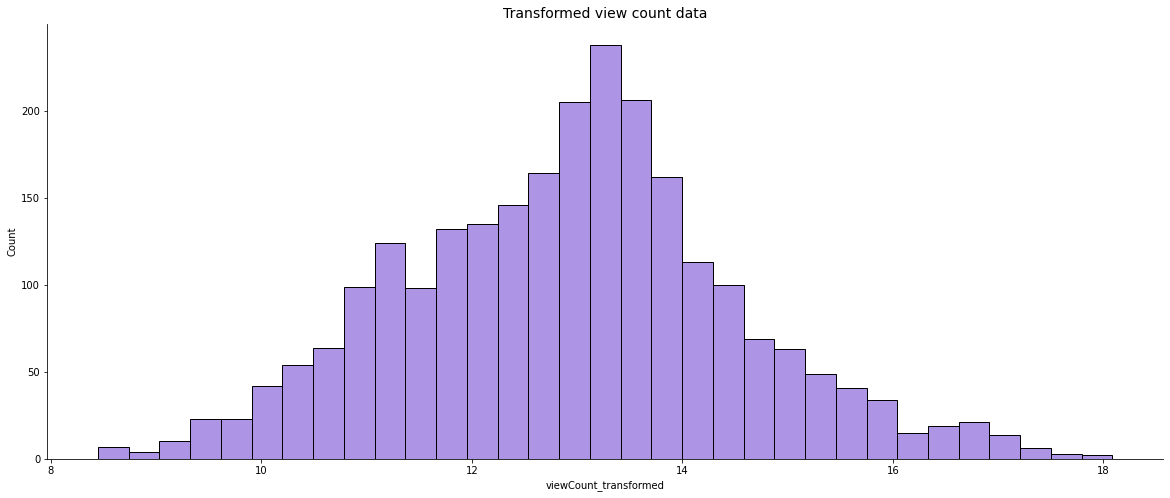

In [56]:
plt.figure(figsize = (20,8))
sns.histplot(  processed, x = "viewCount_transformed", color = "mediumpurple")
# format graph 
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Transformed view count data", fontsize = 14)
plt.show()


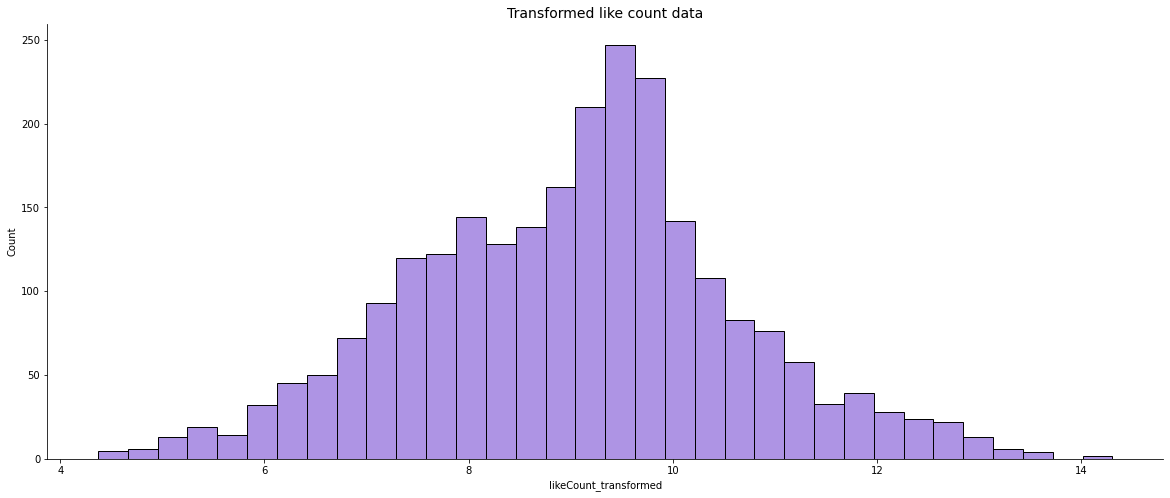

In [57]:
plt.figure(figsize = (20,8))
sns.histplot(  processed, x = "likeCount_transformed", color = "mediumpurple")
# format graph 
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Transformed like count data", fontsize = 14)
plt.show()

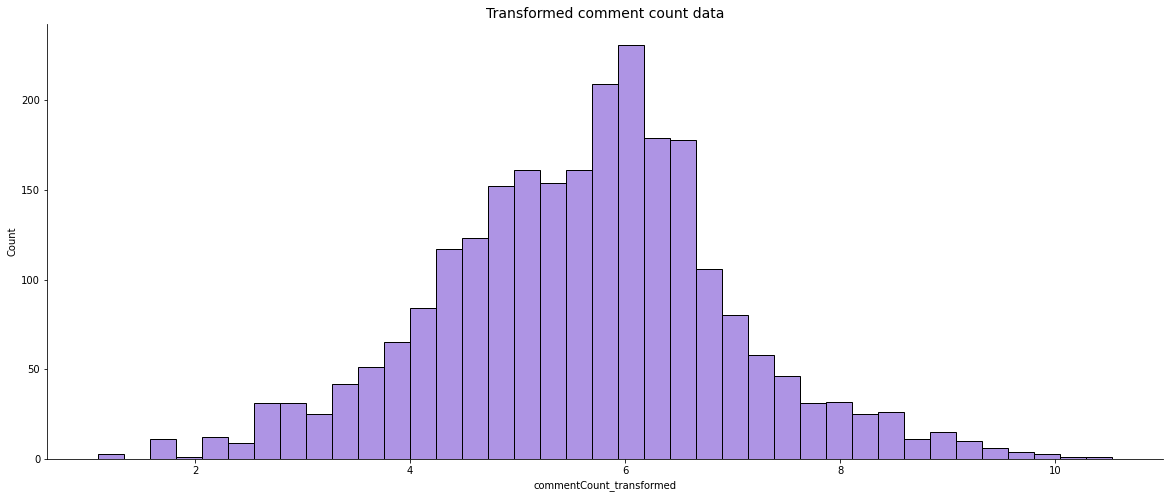

In [58]:
plt.figure(figsize = (20,8))
sns.histplot(  processed, x = "commentCount_transformed",  color = "mediumpurple")

sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Transformed comment count data", fontsize = 14)
plt.show()

This results in the following graph which indicates outliers which appear to focus on low comments and likes relative to views. Furthermore, the search finds most outliers with views by Joe Wick compared to other channels. Given that Joe Wicks was found to be the most likely to not have tags, his lack of knowhow in using the platform and its algorithm effectively may be the case of his videos appearing as outliers. This is also supported by the fact that the majority of the outliers are focused on older videos. 

In [59]:


from sklearn.covariance import EllipticEnvelope

MCD_model = EllipticEnvelope(contamination = 0.05)
# contamination = the proportion of outliers in the dataset

train_t_with_label = processed[['viewCount_transformed', 'likeCount_transformed',
       'commentCount_transformed']]
# model fitting
y_pred = MCD_model.fit_predict(train_t_with_label)

# filter outlier index
idx_MCD = np.where(y_pred == -1)[0] # negative values are outliers

outlier_values = processed.iloc[idx_MCD]

# add status of whether a video is suspected of being an outlier 
processed["status"] = np.where(processed.index.isin(outlier_values.index), "suspected anomaly","expected value")

# set color for outliers
out = {"expected value": "lightgrey", "suspected anomaly": "red"}

#create graph
fig = px.scatter_3d(processed, x = "viewCount_transformed", y = "likeCount_transformed", z ="commentCount_transformed", color = "status", template  = "plotly_white", 
           color_discrete_map=out, opacity=0.8, size_max=18,)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [60]:
#create graph
fig = px.bar(processed, x = "status", y = "channelTitle",color = "channelTitle", facet_col="channelTitle", template  = "simple_white", color_discrete_map=colors,  facet_col_wrap = 3,height = 800,)

# format graph 
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Suspected outliers in views/comments/likes for each channel <b>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 18) )) 

In [61]:
#create graph
fig = px.scatter_3d(processed[processed["channelTitle"]=="The Body Coach TV"], x = "viewCount_transformed", y = "likeCount_transformed", z ="commentCount_transformed", color = "status", template  = "plotly_white", 
           color_discrete_map=out, opacity=0.8, size_max=18,)

# format graph
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [62]:
#create graph
fig= px.scatter(processed[processed["channelTitle"]=="The Body Coach TV"], color = "status",x = "Publish_date", y = "tagCount",
           template  = "simple_white", color_discrete_map=out)

# format graph 
fig.update_layout(showlegend=True, 
                  title= dict(text ="<b>Suspected outliers identified in The Body Coach TV YouTube data<b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 18) )) 

# Conclusion

The remit of fitness YouTube is broad and diverse. Some forcus on how individuals keep fit by discussing popular trends whilst others providing actual workout videos and some even log their fitness jorney. Even when focusing on one aspect, in this case workouts, there are several factors which differentiate them. In addition, as this project highlights, relying on one source such as Social Blade may not be enough to understand the full nature and dynamics.

Beginning with their classification, to upload schedules and tags, some overlap with one another whilst others differ significantly. As a global platform, YouTube is able to also offer an array of creators from around the world. Moreover, the type and focus of workouts differs and as such the audience can find a YouTuber who best services their specific needs.
 
One frustrating factor which is highlighted by one YouTuber is that the level of literacy in using the platform is not uniform. This may prove challenging as regardless of the content, if it has not been uploaded correctly, it is not likely to garner the views it necessarily demands.
 
Until this point, the data has been evaluated on its own and has focused on just the YouTubers. However, aspects uncovered in this project impacts stakeholders such as the audience and possible businesses looking to work with or promote on the videos uploaded by such creators. 

For audiences, understanding the YouTubers ensures that the quality and utility from each video is greatly enhanced and, in this sector, resulting in greater fitness. For businesses who wish to hire a YouTuber for an advert, understanding how they operate is likely to affect the success of the advert. For example, an exercise product manufacturer may be best served by targeting YouTubers such as Heather and their audiences. Companies focusing on healthy eating may benefit from targeting Youtubers such as Emi Wong and Chloe Ting as their audience are likely to be new to their fitness journeys and therefore benefit more from such services. 
 
For each of the creators, whilst the analysis is provided by YouTube, understanding themselves and their competitors can ensure that their videos are those that will strengthen their niche whilst also growing their audience.
 
Finally, the limitations of this project should also be acknowledged. The sample size of 8 highly established YouTubers does not consider the full range of what YouTube has to offer. Definition of workout can include forms such as dance workout and/or yoga. which is not adequately covered. It can be said that MadFit and Pamela offer such videos, but they are not necessarily their focus. Therefore, using a larger sample size is likely to reveal more patterns in how the YouTubers operate and in turn the conclusion is likely to also be more robust. Furthermore, as indicated, the data could be further cleaned for more clarity (ie excluding more non-workout videos).


# Works Cited
## YouTube Channels used for this Project 

    Allblanc TV. “Allblanc TV.” YouTube, 17 Jan 2018, https://www.youtube.com/c/AllblancTV. Accessed 21 August 2022.

    The Body Coach TV (Joe Wicks). “The Body Coach TV.” YouTube, 12 Aug 2011, https://www.youtube.com/c/TheBodyCoachTV. Accessed 21 August 2022.

    Growingannanas. “growingannanas.” YouTube, 20 Jan 2017, https://www.youtube.com/c/growingannanas. Accessed 21 August 2022.

    MadFit. “MadFit on YouTube.” YouTube, 2 Mar 2018, https://www.youtube.com/c/MadFit. Accessed 21 August 2022.

    Reif, Pamela. “on Youtube by Pamela Reif.” YouTube, 16 Sep 2013, https://www.youtube.com/c/PamelaRf1. Accessed 21 August 2022.

    Robertson, Heather. “Heather Robertson's FREE 12 Week Workout Plan.” YouTube, 26 Sep 2014, https://www.youtube.com/c/Heatherrobertsoncom. Accessed 21 August 2022.

    Ting, Chloe. “Chloe Ting YouTube.” YouTube, 17 Aug 2011, https://www.youtube.com/c/ChloeTing. Accessed 21 August 2022.

    Wong, Emi. “Emi Wong YouTube.” YouTube, 2 Nov 2014, https://www.youtube.com/c/EmiWong. Accessed 21 August 2022.


## Project inspired by / Special thank you

Special thanks to the following creators. Their work have inspired this project in various aspects. Mitra Mirshafiee’s work aided in anomaly detection. Jarred Priester’s use of 3D and stacked bar charts inspired some of the visualisations in this project. A slightly altered method outlined by Recall by Dataiku was used to extract and handle the tags. Finally, this project would not be possible without Thu Vu’s video on how to access YouTube API Data. 

    Mirshafiee, Mitra. “Anomaly Detection🤏, Skewed Features and Stories.” Kaggle, 2020, https://www.kaggle.com/code/mitramir5/anomaly-detection-skewed-features-and-stories/notebook. Accessed 20 August 2022.

    Priester, Jarred. “Unsupervised Recommendation System of The Beatles.” Kaggle, 31 July 2022, https://www.kaggle.com/code/jarredpriester/unsupervised-recommendation-system-of-the-beatles. Accessed 21 August 2022.

    Recall by Dataiku. “Solving Real-World Data Analysis Tasks with Python Pandas & Dataiku DSS (Movie Analysis).” YouTube, 3 Aug 2022, https://www.youtube.com/watch?v=GJA_PAnqGY8&t=2103s. Accessed 21 August 2022.

    Vu, Thu. “Create a Unique Data Portfolio Project with Youtube API for Python.” YouTube, 22 Jan 2022, https://www.youtube.com/watch?v=D56_Cx36oGY&t=1175s. Accessed 21 August 2022.
